In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import cv2

character =['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M']

# **建立圖形**

In [4]:
ori_map = np.zeros((8,15))
bw_map = np.zeros((8,15))
for i in range(8):
    for j in range(15):
        if (i+j < 7) | (i+(14-j) < 7):
            bw_map[i][j] = 15
            ori_map[i][j] = 15
        elif (i+j)%2:
            bw_map[i][j] = 0
            ori_map[i][j] = 0
        else:
            bw_map[i][j] = 1
            ori_map[i][j] = 0
print(ori_map)
print(bw_map)
print((bw_map==1).sum(), (bw_map==0).sum())

[[15. 15. 15. 15. 15. 15. 15.  0. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15.  0.  0.  0. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15.  0.  0.  0.  0.  0. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15.  0.  0.  0.  0.  0.  0.  0. 15. 15. 15. 15.]
 [15. 15. 15.  0.  0.  0.  0.  0.  0.  0.  0.  0. 15. 15. 15.]
 [15. 15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 15. 15.]
 [15.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 15.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[15. 15. 15. 15. 15. 15. 15.  0. 15. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15. 15.  0.  1.  0. 15. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15. 15.  0.  1.  0.  1.  0. 15. 15. 15. 15. 15.]
 [15. 15. 15. 15.  0.  1.  0.  1.  0.  1.  0. 15. 15. 15. 15.]
 [15. 15. 15.  0.  1.  0.  1.  0.  1.  0.  1.  0. 15. 15. 15.]
 [15. 15.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0. 15. 15.]
 [15.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0. 15.]
 [ 0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0.  1.  0. 

In [6]:
coor_bw = [np.argwhere(bw_map == 0), np.argwhere(bw_map == 1), np.argwhere(bw_map != 15)]
for i in range(3):
    print(coor_bw[i])

[[ 0  7]
 [ 1  6]
 [ 1  8]
 [ 2  5]
 [ 2  7]
 [ 2  9]
 [ 3  4]
 [ 3  6]
 [ 3  8]
 [ 3 10]
 [ 4  3]
 [ 4  5]
 [ 4  7]
 [ 4  9]
 [ 4 11]
 [ 5  2]
 [ 5  4]
 [ 5  6]
 [ 5  8]
 [ 5 10]
 [ 5 12]
 [ 6  1]
 [ 6  3]
 [ 6  5]
 [ 6  7]
 [ 6  9]
 [ 6 11]
 [ 6 13]
 [ 7  0]
 [ 7  2]
 [ 7  4]
 [ 7  6]
 [ 7  8]
 [ 7 10]
 [ 7 12]
 [ 7 14]]
[[ 1  7]
 [ 2  6]
 [ 2  8]
 [ 3  5]
 [ 3  7]
 [ 3  9]
 [ 4  4]
 [ 4  6]
 [ 4  8]
 [ 4 10]
 [ 5  3]
 [ 5  5]
 [ 5  7]
 [ 5  9]
 [ 5 11]
 [ 6  2]
 [ 6  4]
 [ 6  6]
 [ 6  8]
 [ 6 10]
 [ 6 12]
 [ 7  1]
 [ 7  3]
 [ 7  5]
 [ 7  7]
 [ 7  9]
 [ 7 11]
 [ 7 13]]
[[ 0  7]
 [ 1  6]
 [ 1  7]
 [ 1  8]
 [ 2  5]
 [ 2  6]
 [ 2  7]
 [ 2  8]
 [ 2  9]
 [ 3  4]
 [ 3  5]
 [ 3  6]
 [ 3  7]
 [ 3  8]
 [ 3  9]
 [ 3 10]
 [ 4  3]
 [ 4  4]
 [ 4  5]
 [ 4  6]
 [ 4  7]
 [ 4  8]
 [ 4  9]
 [ 4 10]
 [ 4 11]
 [ 5  2]
 [ 5  3]
 [ 5  4]
 [ 5  5]
 [ 5  6]
 [ 5  7]
 [ 5  8]
 [ 5  9]
 [ 5 10]
 [ 5 11]
 [ 5 12]
 [ 6  1]
 [ 6  2]
 [ 6  3]
 [ 6  4]
 [ 6  5]
 [ 6  6]
 [ 6  7]
 [ 6  8]
 [ 6  9]
 [ 6 10]
 [ 6 11]

# **建立每片拼圖**

In [10]:
puz=[[x] for x in range(13)]
# 3 H字形
puz[0]= [((0,0),(0,1),(-1,1),(1,1),(0,-1),(-1,-1),(1,-1)), ((0,0),(1,0),(1,-1),(1,1),(-1,0),(-1,-1),(-1,1))] 
# 0 長方形
puz[1] = [((0,0),(0,1),(0,2),(1,0),(1,1),(1,2)), ((0,0),(0,1),(1,0),(1,1),(2,0),(2,1))]
# 1 ㄇ字形
puz[2]= [((0,0),(0,1),(0,-1),(-1,1),(-1,-1)), ((0,0),(1,0),(-1,0),(1,1),(-1,1)), ((0,0),(0,-1),(0,1),(1,-1), (1,1)), ((0,0),(-1,0),(1,0),(1,-1),(-1,-1))]
# 1 長拐杖
puz[3] = [((0,0),(0,1),(0,2),(0,3),(1,3)), ((0,0),(1,0),(2,0),(3,0),(3,-1)), ((0,0),(0,-1),(0,-2),(0,-3),(-1,-3)), ((0,0),(-1,0),(-2,0),(-3,0),(-3,1))] 
# 1 Z字形
puz[4] = [((0,0),(0,1),(1,1),(0,-1),(-1,-1)), ((0,0),(1,0),(1,-1),(-1,0),(-1,1))] 
# 1 迴力鏢
puz[5] = [((0,0),(0,1),(0,2),(1,2),(2,2)), ((0,0),(1,0),(2,0),(2,-1),(2,-2)), ((0,0),(0,-1),(0,-2),(-1,-2),(-2,-2)), ((0,0),(-1,0),(-2,0),(-2,1),(-2,2))]
# 0 方形
puz[6] = [((0,0),(0,1),(1,0),(1,1))] 
# 1 側長T字
puz[7] = [((0,0),(0,1),(-1,1),(0,2),(0,3)), ((0,0),(1,0),(1,1),(2,0),(3,0)), ((0,0),(0,-1),(1,-1),(0,-2),(0,-3)), ((0,0),(-1,0),(-1,-1),(-2,0),(-3,0))]
# 1 長腳T字
puz[8] = [((0,0),(0,1),(0,2),(-1,2),(1,1)), ((0,0),(1,0),(2,0),(2,1),(1,-1)), ((0,0),(0,-1),(0,-2),(1,-2),(-1,-1)), ((0,0),(-1,0),(-2,0),(-2,-1),(-1,1))]
# 1 長閃電
puz[9] = [((0,0),(0,1),(0,2),(-1,2),(-1,3)), ((0,0),(1,0),(2,0),(2,1),(3,1)), ((0,0),(0,-1),(0,-2),(1,-2),(1,-3)), ((0,0),(-1,0),(-2,0),(-2,-1),(-3,-1))]
# 0 閃電
puz[10] = [((0,0),(0,1),(1,1),(1,2)), ((0,0),(1,0),(1,-1),(2,-1))] 
# 0 拐杖
puz[11] = [((0,0),(0,1),(0,2),(-1,2)), ((0,0),(1,0),(2,0),(2,1)), ((0,0),(0,-1),(0,-2),(1,-2)), ((0,0),(-1,0),(-2,0),(-2,-1))] 
# 2 T字形
puz[12]= [((0,0),(0,1),(0,2),(1,1)), ((0,0),(1,0),(2,0),(1,-1)), ((0,0),(0,-1),(0,-2),(-1,-1)), ((0,0),(-1,0),(-2,0),(-1,1))]

In [12]:
l=[12,1,10,8,5,4,0,6,7,9,2,3,11]
a = [2,2,2,2,0,0,0,0,0,0,0,1,0]
print("[", end='')
for i in l:
    print(',',a[i], end='')
print("]", end='')

[, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1]

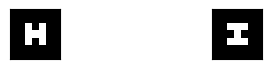

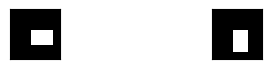

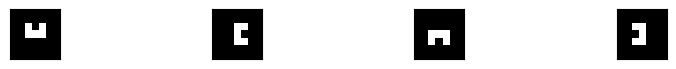

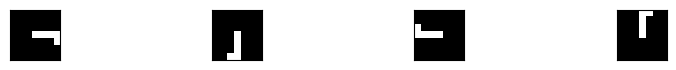

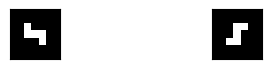

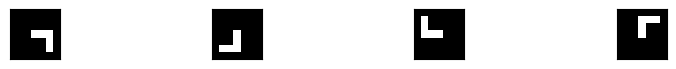

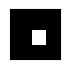

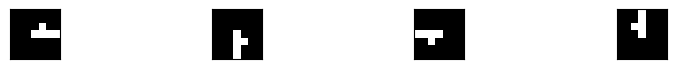

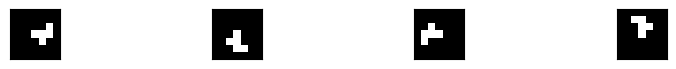

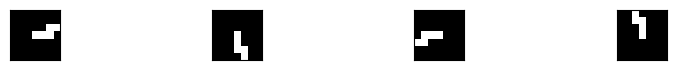

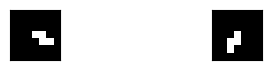

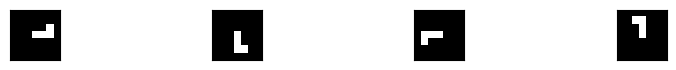

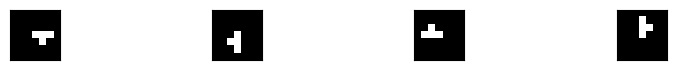

In [14]:
#fig, ax = plt.subplots(13, 4)

for pn, pu in enumerate(puz):
    #print("========")
    #print("block",pn)

    plt.figure(figsize=(10, 10))
    for i, p in enumerate(pu):
        
        b = np.zeros((7,7))
        b[3][3] = 1
        for pos in p[1:]:
            b[pos[0]+3][pos[1]+3] = 1

        ax = plt.subplot(13, 4, pn*4+i+1)
        ax.imshow(b, cmap='gray')#, interpolation='nearest')
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
    
        #ax[pn][i].imshow(b, cmap='gray')#, interpolation='nearest')
        #ax[pn][i].grid(False)
        #ax[pn][i].set_xticks([])
        #ax[pn][i].set_yticks([])
plt.show()


**W 1+1 or 2**   
**B 10**

# **Function**

In [18]:
# W 2
center_color = []
center_color.append([0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1]) # 2 for black or white, 0 for B, 1 for W
# W 1+1
temp = [2,3,4,5,7,8,9]
for i in temp:
    for j in temp[temp.index(i)+1:]:
        cc = [0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0]
        cc[i]=1
        cc[j]=1
        center_color.append(cc)
for cc in center_color:
    print(cc)

[0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1]
[0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2, 0]
[0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0]
[0, 2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 0]
[0, 2, 1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0]
[0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0]
[0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0]
[0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 2, 2, 0]
[0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 2, 2, 0]
[0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 0]
[0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0]
[0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0]
[0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0]
[0, 2, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 0]
[0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0]
[0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0]
[0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 2, 2, 0]
[0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 2, 2, 0]
[0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 2, 2, 0]
[0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0]
[0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0]
[0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0]


In [65]:
def show_map(mmap, save=False, solution=False):
    global fig
    fig+=1
    filename = "D:\\project\\puzzle\\pic\\"+str(fig)+r".jpg" if not solution else "D:\\project\\puzzle\\pic\\full_"+str(fig)+r".jpg"
    # print(filename)
    plt.figure(figsize=(mmap.shape[1], mmap.shape[0]))

    # 定義顏色映射
    colors = ['white'] + [plt.cm.jet(i/14) for i in range(1, 15)] + ['black']
    cmap = mcolors.ListedColormap(colors)

    # 定義顏色邊界
    bounds = [0] + list(range(1, 15)) + [15]
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # 顯示圖像
    plt.imshow(mmap, cmap=cmap, norm=norm)
    if save:
        plt.savefig(filename)
        plt.close()  # 關閉圖形以釋放資源
    else:
        plt.show()

In [67]:
def check_fragments(mmap, coor_bw, center_color, used_puz):
    mmap2 = mmap.copy()
    mmap2[mmap2 ==  0] = -1
    mmap2[mmap2 != -1] =  0
    mmap2[mmap2 == -1] =  1
    num_labels, labels = cv2.connectedComponents(mmap2.astype('uint8'), connectivity=4)
    for label in range(1, num_labels):  # 標籤從 1 開始，0 是背景
        # 找出小於4的空隙，無法擺入拼圖
        frag = np.sum(labels == label)
        if frag < 4:
            return False
        elif frag < 8:

            for puz_i, p in enumerate(puz):
                if (puz_size[puz_i]!=frag) or (used_puz[puz_i]):
                    continue
                
                bw = center_color[puz_i]
                #centers = list( set(coor_bw[bw]).intersection(set(np.argwhere(labels == label))) )
                l1 = coor_bw[bw]
                l2 = np.argwhere(labels == label)
                centers = np.array([x for x in l2 if x in l1])
                for center in centers:
                    for puz_angle in p:
                        put_flag = True
                        # check
                        new_map = mmap.copy()
                        new_coor_bw = coor_bw.copy()
                        for i,j in puz_angle:
                            x = center[0]+i
                            y = center[1]+j
                            if not ( (0<=x<8)and(0<=y<15) ):
                                put_flag = False
                                break
                            if new_map[x][y] != 0:
                                put_flag = False
                                break
                            else:
                                # putting
                                new_map[x][y] = puz_i+1
                                for c in range(3):
                                    del_i = np.where((new_coor_bw[c][:, 0] == x) & (new_coor_bw[c][:, 1] == y))
                                    new_coor_bw[c] = np.delete(new_coor_bw[c], del_i, axis=0)
                    
                        if put_flag:
                            used_puz[puz_i] = True
                            return new_map, new_coor_bw, used_puz, puz_i
            return False
        elif frag == 8: # 4 + 4
            ps = np.array(puz_size)
            pu = np.array(used_puz)
            if len(np.argwhere(ps[pu==False]==4)) < 2:
                return False
        elif frag == 9: # 4 + 5
            ps = np.array(puz_size)
            pu = np.array(used_puz)
            if (len(np.argwhere(ps[pu==False]==4)) < 1) or (len(np.argwhere(ps[pu==False]==5)) < 1):
                return False
        elif frag == 10: # 5 + 5
            ps = np.array(puz_size)
            pu = np.array(used_puz)
            if len(np.argwhere(ps[pu==False]==5)) < 2:
                return False
    return True

In [69]:
def putting(mmap, coor_bw, center_color, used_puz, puz_i):
    bw = center_color[puz_i]
    # print("Start")
    for center in coor_bw[bw]:
        # print("center")
        for puz_angle in puz[puz_i]:
            # print("angle")
            put_flag = True
            # check
            new_map = mmap.copy()
            new_coor_bw = coor_bw.copy()
            for i,j in puz_angle:
                x = center[0]+i
                y = center[1]+j
                if not ( (0<=x<8)and(0<=y<15) ):
                    put_flag = False
                    # print("out")
                    break                    
                if mmap[x][y] != 0:
                    # print("False")
                    put_flag = False
                    break
                else:
                    # print("True")
                    # putting
                    new_map[x][y] = puz_i+1
                    for c in range(3):
                        del_i = np.where((new_coor_bw[c][:, 0] == x) & (new_coor_bw[c][:, 1] == y))
                        new_coor_bw[c] = np.delete(new_coor_bw[c], del_i, axis=0)
            if put_flag:
                used_puz[puz_i] = True
                frag_i = -1
                
                check = check_fragments(new_map, new_coor_bw, center_color, used_puz)
                if check != False:
                    if check != True:
                        # fragment exist but fill
                        new_map, new_coor_bw, used_puz, frag_i = check
                    # True, no fragment
                else:
                    # False, fragment exist
                    used_puz[puz_i] = False
                    continue

                if sum(used_puz) > 10:
                    #print(used_puz)
                    show_map(new_map, save=True, solution=not False in used_puz)
                    # early stop
                    global fig
                    if fig == -1:
                        return 0

                if putting(new_map, new_coor_bw, center_color, used_puz, used_puz.index(False)) == 0: 
                    used_puz[puz_i] = False
                    if frag_i != -1:
                        used_puz[frag_i] = False
                    return 0
                    
                used_puz[puz_i] = False
                if frag_i != -1:
                    used_puz[frag_i] = False
    return 1
    

# **Start**

In [75]:
used_puz = [False]*13
puz_size = [len(p[0]) for p in puz]
fig = 215
for i, cc in enumerate(center_color[5:]):
    print(i+5, cc)
    putting(ori_map, coor_bw, cc, used_puz, 0)

5 [0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 0]
6 [0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0]
7 [0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 2, 2, 0]
8 [0, 2, 0, 1, 0, 1, 2, 0, 0, 0, 2, 2, 0]
9 [0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 2, 2, 0]
10 [0, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0]
11 [0, 2, 0, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0]
12 [0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0]
13 [0, 2, 0, 0, 1, 0, 2, 1, 0, 0, 2, 2, 0]
14 [0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 0]
15 [0, 2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0]
16 [0, 2, 0, 0, 0, 1, 2, 1, 0, 0, 2, 2, 0]
17 [0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 2, 2, 0]
18 [0, 2, 0, 0, 0, 1, 2, 0, 0, 1, 2, 2, 0]
19 [0, 2, 0, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0]
20 [0, 2, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0]
21 [0, 2, 0, 0, 0, 0, 2, 0, 1, 1, 2, 2, 0]
